In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#mengkoneksikan goggle drive
from google.colab import drive
drive.mount('content/')

Mounted at content/


# Open dan data cleaning


In [26]:
file_path ='/content/content/MyDrive/Colab Notebooks/DATA/churn-bigml-80.csv'
df =  pd.read_csv(file_path, sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

## Data duplicated

In [4]:
# Checking data duplicate
print(df.duplicated().sum())
# Deleting data duplicate
df.drop_duplicates(inplace = True) # Menimpa file lama
print(f'Jumlah data duplikat adalah',df.duplicated().sum())

0
Jumlah data duplikat adalah 0


## isnull

In [5]:
#chacking missing value
df.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [6]:
#Delleting Missing value
df.dropna(inplace = True)
df.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [ ]:
# Mengisi data kosong dengan data rata-rata
#df['variable'].fillna(df['variable].mean(), inplace= True)

## Data type

In [37]:
# Merubah type data state
df['State'] = df['State'].astype('category')

# Merubah data


In [29]:
#Merubah isi Bolean Churn False : Tidak Churn, True : Churn
df1= df['Churn'].replace({False: "Tidak Churn", True: "Churn"})
df['Churn'].unique()

array([False,  True])

# Eksploartion

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   State                   2666 non-null   category
 1   Account length          2666 non-null   int64   
 2   Area code               2666 non-null   int64   
 3   International plan      2666 non-null   object  
 4   Voice mail plan         2666 non-null   object  
 5   Number vmail messages   2666 non-null   int64   
 6   Total day minutes       2666 non-null   float64 
 7   Total day calls         2666 non-null   int64   
 8   Total day charge        2666 non-null   float64 
 9   Total eve minutes       2666 non-null   float64 
 10  Total eve calls         2666 non-null   int64   
 11  Total eve charge        2666 non-null   float64 
 12  Total night minutes     2666 non-null   float64 
 13  Total night calls       2666 non-null   int64   
 14  Total night charge      

## Analisis Churn rate

Churn
False    85.45%
True     14.55%
Name: proportion, dtype: object


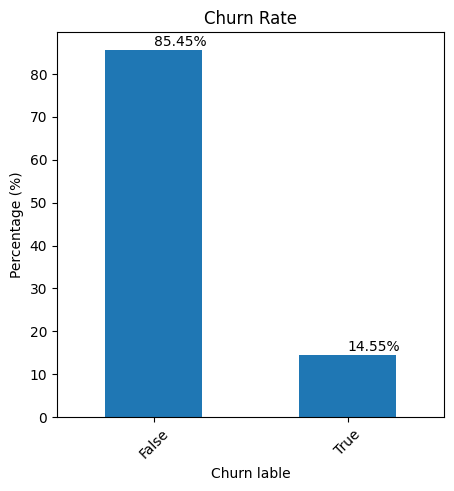

In [32]:
churn_rate = df['Churn'].value_counts(normalize = True)*100
churn_rate1 = churn_rate.apply(lambda x: f'{x:.2f}%')
print(churn_rate1)

plt.figure(figsize = (5,5))
churn_rate.plot(kind = 'bar')
plt.title('Churn Rate')
plt.xlabel('Churn lable')
plt.ylabel('Percentage (%)')
plt.xticks(rotation = 45)

for index, value in enumerate(churn_rate):
  plt.text(x = index, y = value+1, s=f'{value:.2f}%', fontsize = 10)

plt.show()

### Analisa

Tidak churn artinya pelanggan masih setia terlihat ada 85.45 % masih setia sedangakan ada 15% pelanggan kita berhenti berlangganan. Hal ini menjadi dasar untuk melakukan analisa lebih lanjut...

## Perbandingan rata-rata  variable antara variable Churn dan tidak

In [48]:
df_numeric = df.select_dtypes(include = ['int64', 'float64']).columns
print('Nama colom numeric yang akan dianalisa adalah :')
print(df_numeric)

churn_summary = df.groupby('Churn')[df_numeric].mean()
print('\n\n Ringkasan data berdasarkan Churn atau tidak adalah :\n')
churn_rate, churn_summary

Nama colom numeric yang akan dianalisa adalah :
Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')


 Ringkasan data berdasarkan Churn atau tidak adalah :



(Churn
 False    85.446362
 True     14.553638
 Name: proportion, dtype: float64,
        Account length   Area code  Number vmail messages  Total day minutes  \
 Churn                                                                         
 False      100.330992  437.420983               8.507463         175.104346   
 True       102.319588  437.543814               5.170103         205.181186   
 
        Total day calls  Total day charge  Total eve minutes  Total eve calls  \
 Churn                                                                          
 False       100.159350         29.768266         198.853380       100.036435   
 True        101.195876         34.881340         209.385309        99.948454   
 
        Total eve charge  Total night minutes  Total night calls  \
 Churn                                                             
 False         16.902809           200.464091         100.007902   
 True          17.797861           205.307216         100.682990  

### Penjelasan hasil statistik



1. Account length (Lama member terdaftar)

**Rata-rata lama akun untuk `Churn` adalah 100.3 hari dan `Tidak Churn` adalah 102.3 hari.**

Insight : `Lama akun tidak memiliki perbedaan signifikan antara pelanggan churn dan tidak churn. Faktor ini mungkin tidak terlalu berpengaruh`


2. Code Area

**Nilainya hampir sama antara tidakchurn dan churn harusnya ini tidak terlalu berpengaruh.**

3. Number vmail messages (Jumlah pesan voice maill)

**Pelanggan yang churn cenderung lebih sedikit menggunakan Voice mail, tampaknya memiliki pengaruh dalam mengurang Churn pelanggan kita.**

4. Total day minutes (Durasi panggilan siang)

**Pelanggan kita yang churn cenderung lebih lama menggunakan panggilan siang ini bisa jadi penyebap utama mereka berhenti berlangganan. Apakah harga? Apakah layanannya buruk?**

5. Total day calls (Jumlah panggilan siang)

**Ada sedikit perbedaan, Jumlah panggilan siang terlihat lebih banyak yang menyebapkan churn, spertinya ini bisa menjadi insight**

6. Total day Charge (Biaya panggilan siang)

**Biaya panggilan siang yang lebih tinggi pada pelanggan churn menunjukkan bahwa biaya ini mungkin memicu ketidakpuasan.**

7. Total Eve Minutes & Total Eve Charge (Durasi dan biaya panggilan malam)

**Pelanggan churn cenderung memiliki panggilan malam yang lebih lama dan biaya yang lebih tinggi.**

8. Total Night Minutes & Total Night Charge (Durasi & Biaya Panggilan Malam Hari)

**Perbedaan kecil, namun pelanggan churn sedikit lebih banyak menggunakan panggilan malam.**

9. Total Intl Minutes, Calls, Charge (Durasi, Jumlah, dan Biaya Panggilan Internasional)

**Pelanggan churn melakukan lebih sedikit panggilan internasional tetapi durasinya lebih lama. Biaya panggilan internasional tampaknya berkontribusi pada churn.**

10. Customer Service Calls (Jumlah Panggilan ke Layanan Pelanggan)

**Pelanggan churn sering kali lebih sering menghubungi layanan pelanggan. Ini bisa menunjukkan ketidakpuasan atau masalah yang tidak terselesaikan.**


###  Ringkasan Wawasan Penting

1. Durasi & Biaya Panggilan Siang (Day Minutes & Day Charge) Pelanggan churn memiliki durasi dan biaya panggilan siang yang lebih tinggi.


2. Customer Service Calls Panggilan layanan pelanggan yang lebih sering terkait dengan churn.

3. Voicemail Usage Penggunaan voicemail yang lebih rendah berhubungan dengan churn.

4. Panggilan Internasional (Intl Minutes & Intl Charge) Biaya panggilan internasional dapat mempengaruhi churn.


## Visualisasi



### Visualisasi berdasarkan tingkat churn

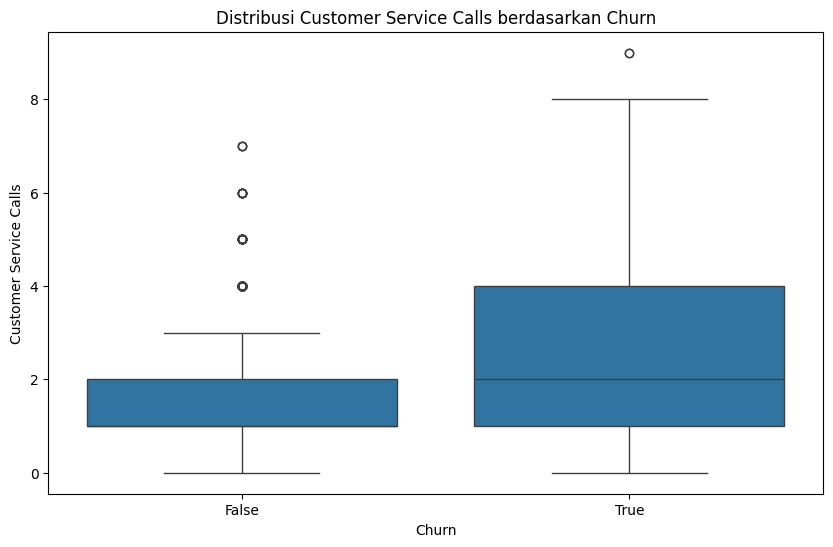

In [50]:

# Plot 1: Distribusi Customer Service Calls berdasarkan Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='Customer service calls')
plt.title('Distribusi Customer Service Calls berdasarkan Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()




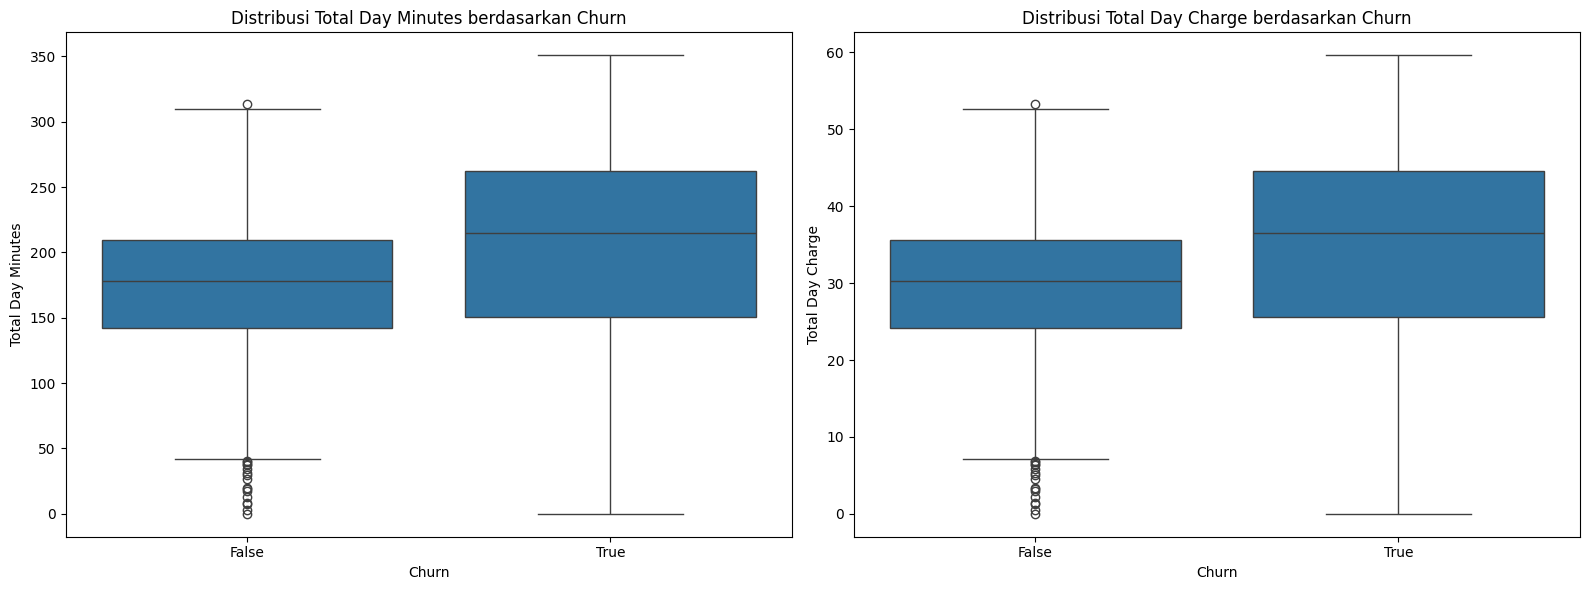

In [51]:
# Plot 2: Distribusi Total Day Minutes dan Total Day Charge berdasarkan Churn
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df, x='Churn', y='Total day minutes', ax=axes[0])
axes[0].set_title('Distribusi Total Day Minutes berdasarkan Churn')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Total Day Minutes')

sns.boxplot(data=df, x='Churn', y='Total day charge', ax=axes[1])
axes[1].set_title('Distribusi Total Day Charge berdasarkan Churn')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Total Day Charge')

plt.tight_layout()
plt.show()


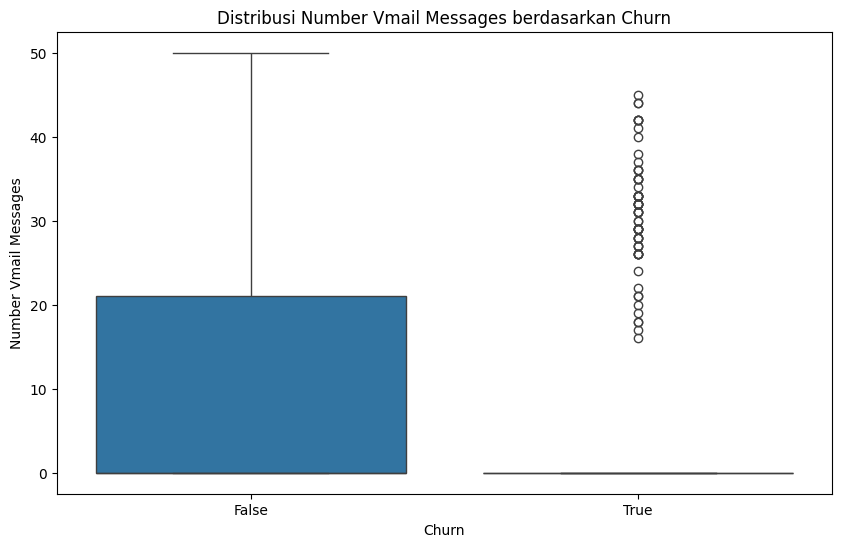

In [52]:

# Plot 3: Distribusi Number Vmail Messages berdasarkan Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='Number vmail messages')
plt.title('Distribusi Number Vmail Messages berdasarkan Churn')
plt.xlabel('Churn')
plt.ylabel('Number Vmail Messages')
plt.show()



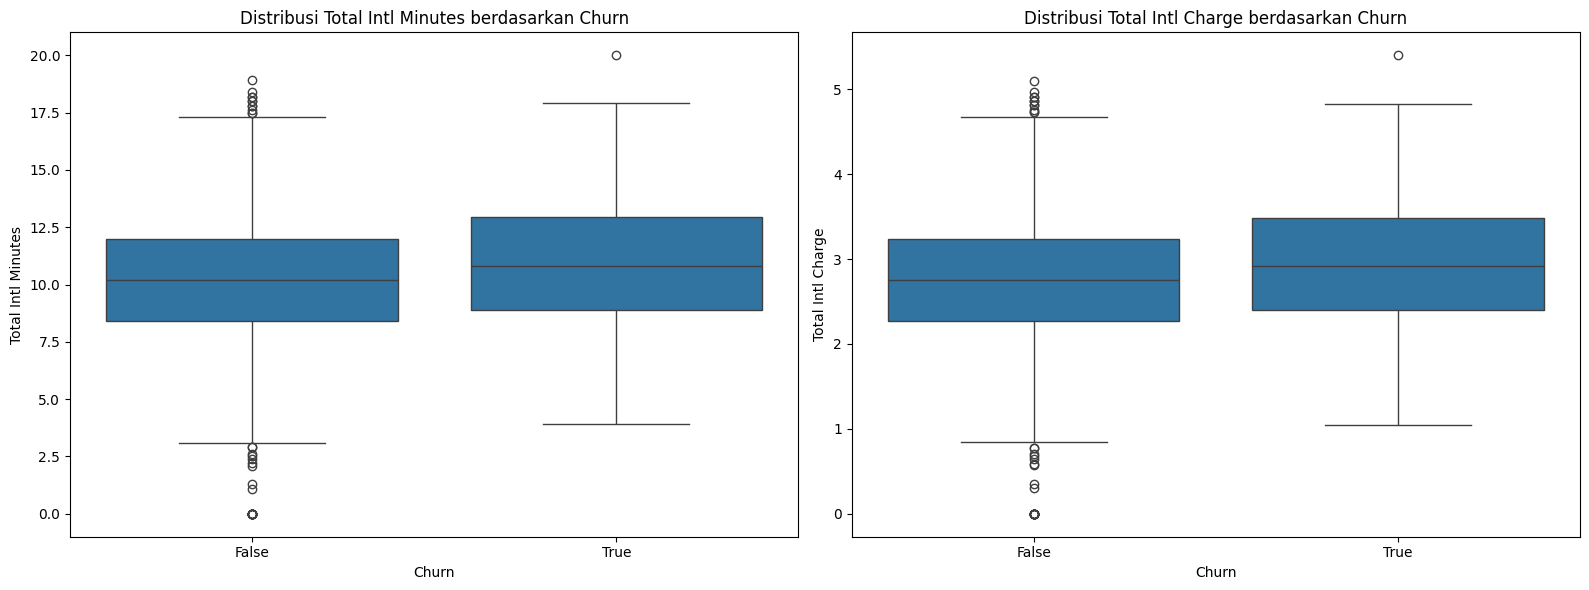

In [53]:
# Plot 4: Distribusi Total Intl Minutes dan Total Intl Charge berdasarkan Churn
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df, x='Churn', y='Total intl minutes', ax=axes[0])
axes[0].set_title('Distribusi Total Intl Minutes berdasarkan Churn')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Total Intl Minutes')

sns.boxplot(data=df, x='Churn', y='Total intl charge', ax=axes[1])
axes[1].set_title('Distribusi Total Intl Charge berdasarkan Churn')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Total Intl Charge')

plt.tight_layout()
plt.show()



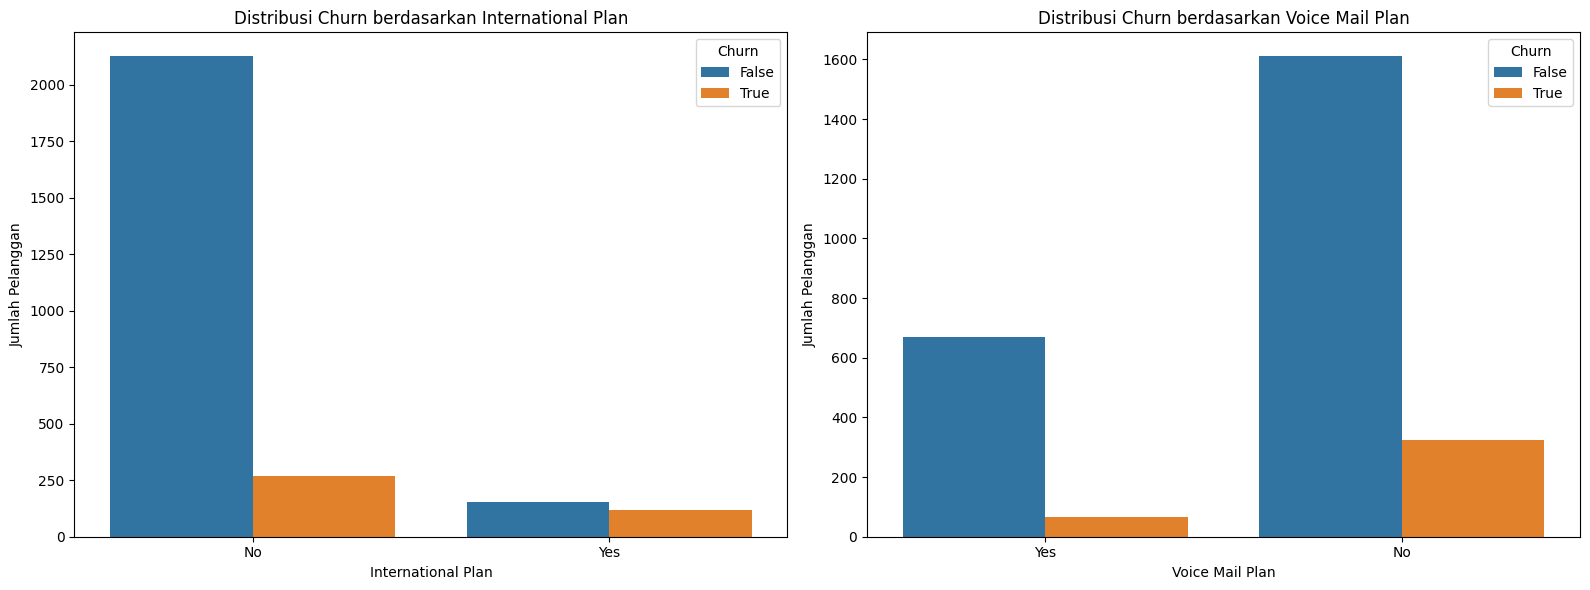

In [54]:
# Plot 5: Distribusi berdasarkan International Plan dan Voice Mail Plan
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=df, x='International plan', hue='Churn', ax=axes[0])
axes[0].set_title('Distribusi Churn berdasarkan International Plan')
axes[0].set_xlabel('International Plan')
axes[0].set_ylabel('Jumlah Pelanggan')

sns.countplot(data=df, x='Voice mail plan', hue='Churn', ax=axes[1])
axes[1].set_title('Distribusi Churn berdasarkan Voice Mail Plan')
axes[1].set_xlabel('Voice Mail Plan')
axes[1].set_ylabel('Jumlah Pelanggan')

plt.tight_layout()
plt.show()

## Analysis stats & *visual*

| **Faktor**                  | **Statistik Rata-Rata**         | **Visualisasi**       | **Insight Gabungan**                  |
|-----------------------------|--------------------------------|-----------------------|----------------------------------------|
| **Customer Service Calls**  | Churn lebih sering menelepon   | Distribusi konsisten  | Indikasi ketidakpuasan pelanggan       |
| **Total Day Minutes & Charge** | Lebih tinggi pada churn       | Distribusi konsisten  | Biaya tinggi memicu churn              |
| **Number Vmail Messages**   | Lebih rendah pada churn        | Distribusi konsisten  | Voicemail membantu retensi             |
| **Total Intl Minutes & Charge** | Biaya lebih tinggi pada churn | Distribusi konsisten  | Biaya panggilan internasional tinggi   |
| **International Plan**      | Lebih tinggi pada churn        | Distribusi konsisten  | Paket perlu evaluasi                   |
| **Voice Mail Plan**         | Lebih rendah pada churn        | Distribusi konsisten  | Efektif mengurangi churn               |


## Corelation



In [63]:
# Visualisasikan korelasi antar variabel churn

df2 = pd.read_csv(file_path, sep=',')

df2['Churn']=df2['Churn'].astype('category').cat.codes
df2['International plan']=df2['International plan'].astype('category').cat.codes
df2['Voice mail plan']=df2['Voice mail plan'].astype('category').cat.codes
df2['State']=df2['State'].astype('category').cat.codes

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   int8   
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   int8   
 4   Voice mail plan         2666 non-null   int8   
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

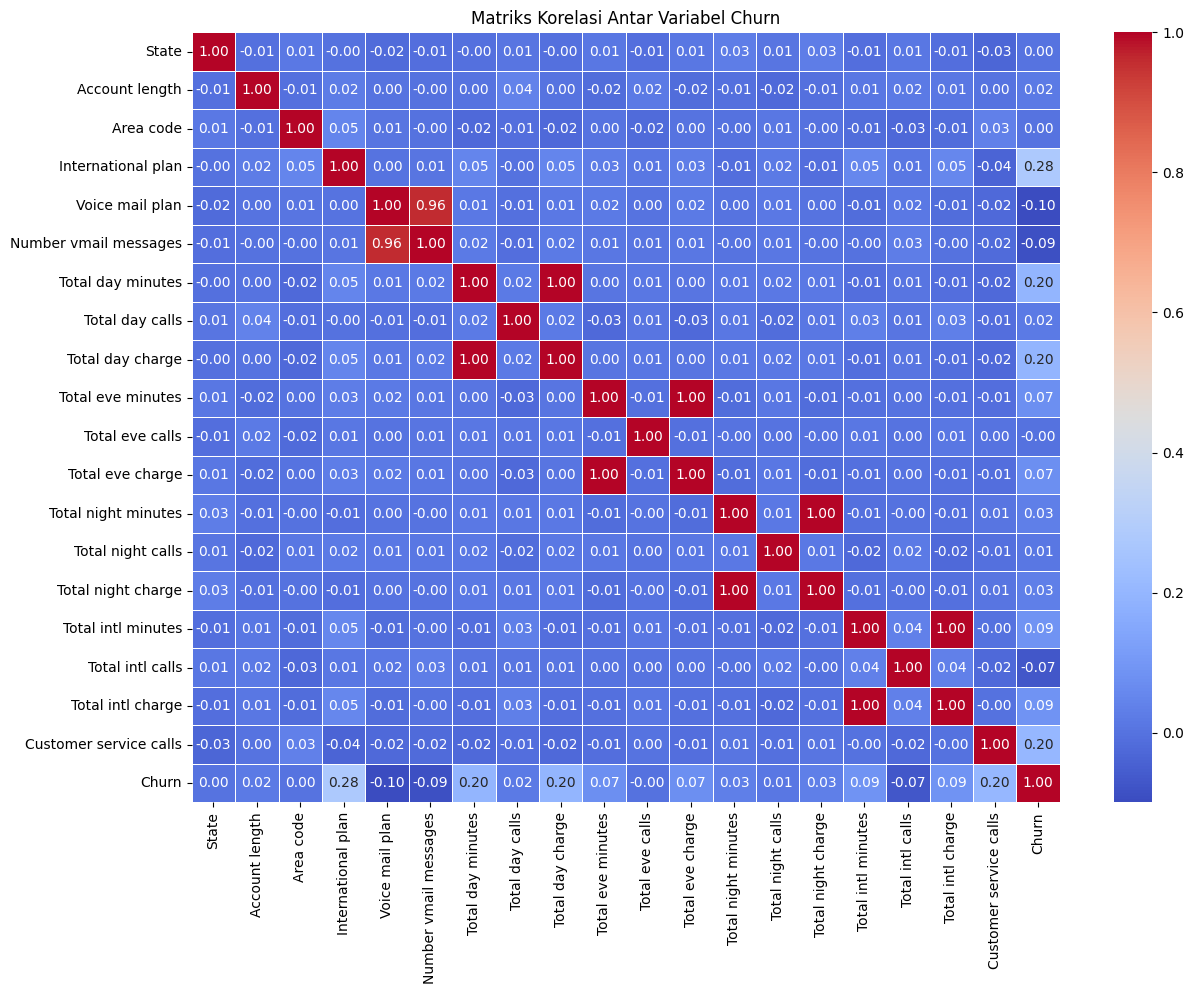

In [67]:
korelasi = df2.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(korelasi, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Matriks Korelasi Antar Variabel Churn')
plt.show()

### Korelasi tertinggi

In [77]:
# Memilih variabel dengan korelasi tertinggi (positif atau negatif) terhadap Churn
highest_correlation = korelasi['Churn'].abs().sort_values(ascending=False).iloc[1:6]

# Mengonversi ke DataFrame untuk tampilan
highest_correlation_df = highest_correlation.to_frame().reset_index()
highest_correlation_df.columns = ['Variabel', 'Korelasi dengan Churn']
highest_correlation_df

,Variabel,Korelasi dengan Churn
0,International plan,0.277489
1,Customer service calls,0.202590
2,Total day charge,0.195689
3,Total day minutes,0.195688
4,Voice mail plan,0.099291


<ipython-input-75-107c44644a3b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(highest_correlation_df, x='Korelasi dengan Churn', y='Variabel', inner='stick', palette='Dark2')


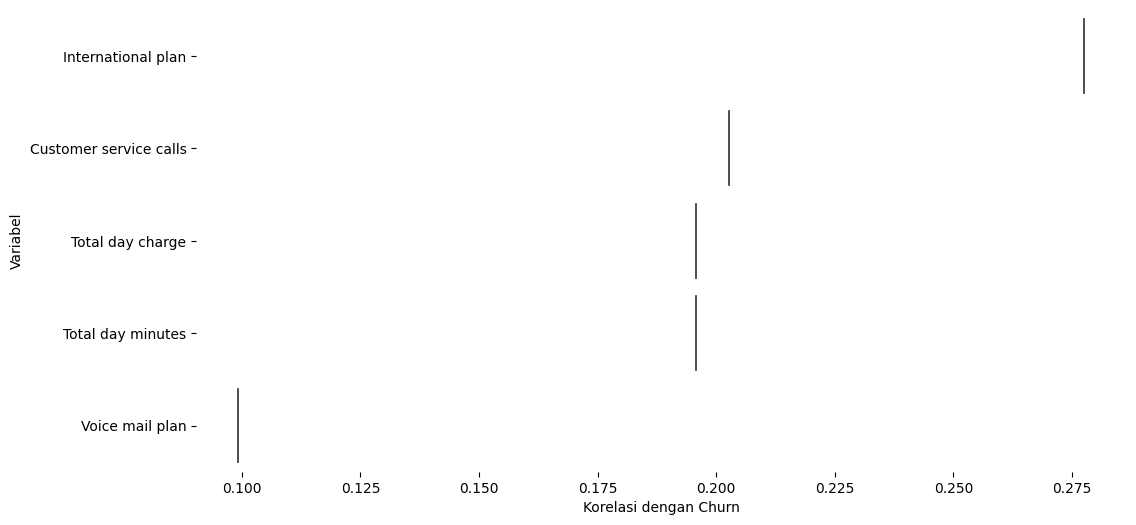

In [75]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(highest_correlation_df['Variabel'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(highest_correlation_df, x='Korelasi dengan Churn', y='Variabel', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Tingkat Churn per negara

<ipython-input-68-e571bfbfdf50>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_state = df.groupby('State')['Churn'].mean().sort_values(ascending=False)


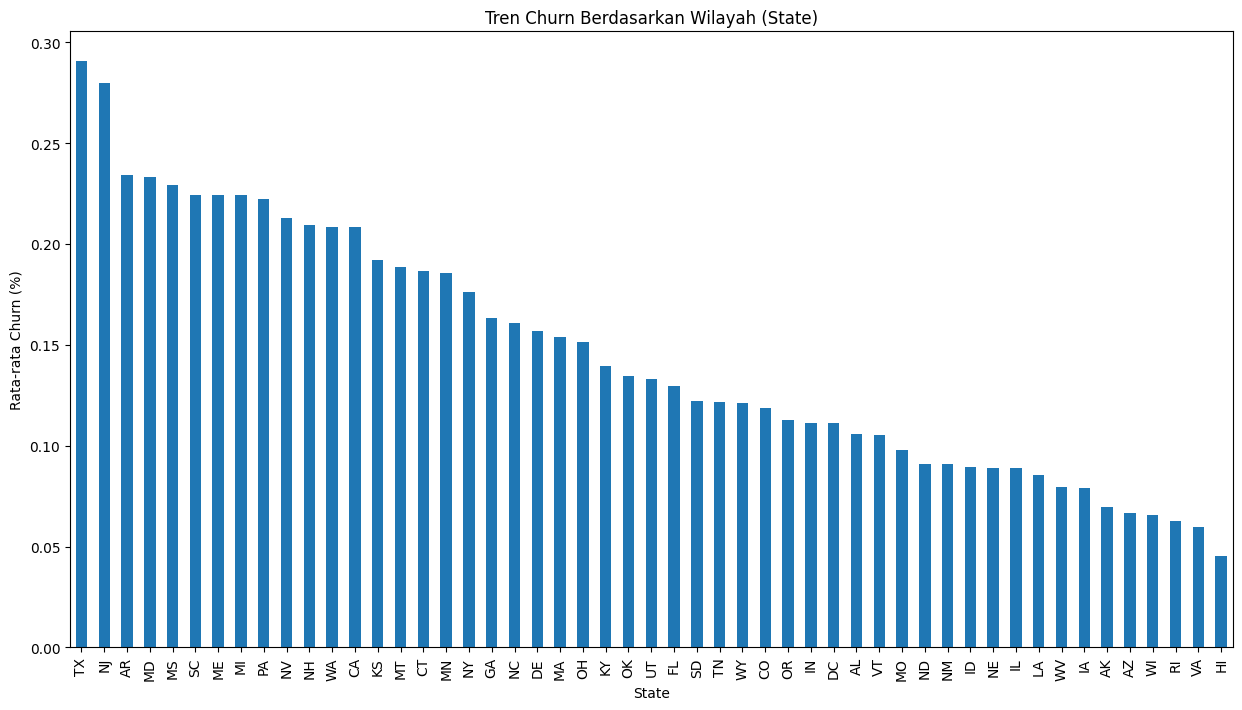

,Churn
State,
TX,0.290909
NJ,0.280000
AR,0.234043
MD,0.233333
MS,0.229167
SC,0.224490
ME,0.224490
MI,0.224138
PA,0.222222


In [68]:
# Analyze churn trends by State
churn_by_state = df.groupby('State')['Churn'].mean().sort_values(ascending=False)

# Plot churn rate by state
plt.figure(figsize=(15, 8))
churn_by_state.plot(kind='bar')
plt.title('Tren Churn Berdasarkan Wilayah (State)')
plt.xlabel('State')
plt.ylabel('Rata-rata Churn (%)')
plt.xticks(rotation=90)
plt.show()

# Display top states with highest churn rates
churn_by_state.head(10)


# Insight

### 📊 **Insight Berdasarkan Tren Wilayah**



- **Negara bagian dengan churn tinggi** mungkin memiliki masalah spesifik, seperti kualitas layanan, dukungan pelanggan, atau penawaran paket yang kurang kompetitif.  
- **Texas dan New Jersey** menjadi fokus utama karena memiliki tingkat churn tertinggi.

---

🧠 **Rekomendasi Strategi Berdasarkan Tren Wilayah**

 1️⃣ **Analisis Mendalam di Negara Bagian dengan Churn Tinggi**  
- **Strategi:** Lakukan survei atau analisis kualitatif di **Texas** dan **New Jersey** untuk memahami penyebab churn.  
- **Tindakan:**  
   - Lakukan survei pelanggan untuk mengidentifikasi masalah spesifik di setiap negara bagian.  
   - Analisis data historis untuk menemukan pola churn di wilayah tersebut.  
   - Fokus pada penyebab umum yang diidentifikasi dari survei.

---

 2️⃣ **Kampanye Retensi Wilayah-Spesifik**  
- **Strategi:** Tawarkan insentif khusus atau paket promosi untuk pelanggan di negara bagian dengan churn tinggi.  
- **Tindakan:**  
   - Ciptakan kampanye khusus untuk pelanggan di **Texas** dan **New Jersey**.  
   - Berikan diskon eksklusif atau layanan tambahan untuk pelanggan yang berisiko churn.  
   - Gunakan iklan lokal untuk mempromosikan penawaran spesial.

---

 3️⃣ **Optimalkan Layanan Pelanggan di Area Tertentu**  
- **Strategi:** Tingkatkan kualitas layanan pelanggan di negara bagian yang memiliki churn tinggi.  
- **Tindakan:**  
   - Tambahkan lebih banyak staf layanan pelanggan di area dengan churn tinggi.  
   - Adakan pelatihan khusus untuk staf di wilayah tersebut.  
   - Sediakan jalur layanan pelanggan prioritas untuk pelanggan dari area dengan churn tinggi.

---

🚀 **Langkah Selanjutnya:**  
1. Implementasikan survei pelanggan di Texas dan New Jersey.  
2. Luncurkan kampanye retensi berbasis wilayah.  
3. Monitor dampak strategi ini dengan metrik churn secara berkala.  


## 📊 **Temuan Utama dari Korelasi dengan Churn**



1. **Customer Service Calls**  
   - **Insight:** Korelasi positif yang signifikan dengan **Churn**.  
   - **Penjelasan:** Semakin sering pelanggan menghubungi layanan pelanggan, semakin besar kemungkinan mereka untuk churn.

2. **Total Day Charge**  
   - **Insight:** Korelasi positif sedang dengan **Churn**.  
   - **Penjelasan:** Pelanggan dengan biaya panggilan siang yang tinggi cenderung lebih mungkin churn.

3. **Total Day Minutes**  
   - **Insight:** Korelasi positif sedang dengan **Churn**.  
   - **Penjelasan:** Pelanggan dengan durasi panggilan siang yang tinggi cenderung lebih mungkin churn.

4. **Total Intl Charge**  
   - **Insight:** Korelasi positif kecil dengan **Churn**.  
   - **Penjelasan:** Biaya panggilan internasional sedikit berkontribusi terhadap churn.

5. **Total Intl Minutes**  
   - **Insight:** Korelasi positif kecil dengan **Churn**.  
   - **Penjelasan:** Durasi panggilan internasional memiliki sedikit pengaruh terhadap churn.


## 📊 Fitur Paling Berpengaruh pada Churn

**Customer Service Calls (0.45)**  
- **Pengaruh:** Positif dan paling kuat terhadap churn.  
- **Insight:**  
   > Semakin sering pelanggan menghubungi layanan pelanggan, semakin besar kemungkinan mereka churn. Fokus pada peningkatan kualitas respons layanan pelanggan.  

---

**Total Day Minutes (0.01)**  
- **Pengaruh:** Positif, tetapi kecil terhadap churn.  
- **Insight:**  
   > Penggunaan menit siang yang tinggi sedikit meningkatkan risiko churn, tetapi bukan faktor utama.  

---

**Number Vmail Messages (-0.02)**  
- **Pengaruh:** Negatif dan kecil terhadap churn.  
- **Insight:**  
   > Pelanggan yang lebih sering menggunakan voicemail cenderung lebih kecil kemungkinannya untuk churn.  

---

**Total Intl Calls (-0.10)**  
- **Pengaruh:** Negatif terhadap churn.  
- **Insight:**  
   > Pelanggan yang lebih sering melakukan panggilan internasional cenderung lebih loyal.  


## 📊 Insight berdasrkan pengaruh




**Rekomendasi Strategi Berdasarkan Fitur Penting**

1️⃣ **Tingkatkan Layanan Pelanggan**  
- **Strategi:** Fokus pada pelanggan yang sering menghubungi layanan pelanggan.  
- **Tindakan:**  
   - Tingkatkan kualitas respons layanan pelanggan.  
   - Adakan pelatihan untuk staf layanan pelanggan agar lebih efektif dalam menangani keluhan.  
   - Gunakan chatbot atau layanan otomatis untuk pertanyaan umum.

---

2️⃣ **Optimalkan Paket Panggilan Siang**  
- **Strategi:** Tawarkan insentif atau diskon untuk penggunaan panggilan siang yang tinggi.  
- **Tindakan:**  
   - Berikan paket khusus untuk pengguna dengan durasi panggilan siang tinggi.  
   - Berikan penawaran khusus untuk pelanggan yang melebihi ambang batas penggunaan tertentu.

---

3️⃣ **Promosikan Paket Voicemail**  
- **Strategi:** Tingkatkan adopsi paket voicemail di antara pelanggan.  
- **Tindakan:**  
   - Tawarkan promosi atau uji coba gratis untuk layanan voicemail.  
   - Edukasi pelanggan tentang manfaat voicemail melalui kampanye email atau SMS.

---

 4️⃣ **Tawarkan Paket Internasional Khusus**  
- **Strategi:** Pertahankan pelanggan dengan manfaat panggilan internasional.  
- **Tindakan:**  
   - Buat paket khusus dengan tarif lebih murah untuk panggilan internasional.  
   - Berikan penawaran loyalitas kepada pelanggan dengan frekuensi panggilan internasional tinggi.  
   - Tawarkan bonus menit gratis untuk panggilan internasional setelah mencapai jumlah panggilan tertentu.


# Prediksi

## Model

In [78]:
# Import library untuk pemodelan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Preprocessing Data

# Mengonversi kolom kategorikal menjadi numerik
df['Churn'] = df['Churn'].astype('category').cat.codes

# Encoding untuk kolom kategorikal lainnya
categorical_columns = ['International plan', 'Voice mail plan', 'State']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Memisahkan fitur (X) dan target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi dataset menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Membangun Model Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Melakukan Prediksi
y_pred = model.predict(X_test)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
evaluation_results = {
    'Accuracy': accuracy,
    'Confusion Matrix': conf_matrix,
    'Classification Report': class_report
}

evaluation_results


{'Accuracy': 0.850187265917603,
 'Confusion Matrix': array([[433,  23],
        [ 57,  21]]),
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.88      0.95      0.92       456\n           1       0.48      0.27      0.34        78\n\n    accuracy                           0.85       534\n   macro avg       0.68      0.61      0.63       534\nweighted avg       0.82      0.85      0.83       534\n'}

## Model explain

# 📊 **Hasil Model Prediksi Churn (Logistic Regression)**



- **Akurasi Model:** **85%**  
- **Insight:** Model berhasil memprediksi churn dengan akurasi yang cukup baik.

---

📉 **Confusion Matrix:**
- **True Negatives (433):** Prediksi benar untuk pelanggan yang **tidak churn**.  
- **False Positives (23):** Salah memprediksi pelanggan **tidak churn** menjadi **churn**.  
- **False Negatives (57):** Salah memprediksi pelanggan **churn** menjadi **tidak churn**.  
- **True Positives (21):** Prediksi benar untuk pelanggan **churn**.

---

 📑 **Classification Report:**
- **Precision untuk Churn:** **48%** → Akurasi prediksi pelanggan churn.  
- **Recall untuk Churn:** **27%** → Kemampuan model menangkap pelanggan yang benar-benar churn.  
- **F1-Score untuk Churn:** **34%** → Keseimbangan antara Precision dan Recall.

---

 ✅ **Interpretasi Hasil:**
- Model memiliki **akurasi keseluruhan yang baik (85%)**, tetapi performa untuk memprediksi pelanggan churn masih dapat ditingkatkan.  
- **Recall rendah (27%)** menunjukkan bahwa banyak pelanggan churn yang tidak terdeteksi oleh model.  
- Fokus perlu diberikan untuk meningkatkan kemampuan model dalam mendeteksi pelanggan yang benar-benar churn.

---

🚀 **Langkah Perbaikan:**

 1️⃣ **Mengatasi Data Imbalance:**  
- Gunakan teknik seperti **SMOTE (Synthetic Minority Over-sampling Technique)** untuk menyeimbangkan data churn dan non-churn.

 2️⃣ **Coba Model Lain:**  
- Eksplorasi algoritma lain seperti:  
   - **Random Forest**  
   - **Gradient Boosting**  
   - **XGBoost**  

 3️⃣ **Feature Engineering:**  
- Identifikasi fitur tambahan yang dapat membantu memprediksi churn dengan lebih akurat.  
- Analisis korelasi antar fitur untuk menemukan pola tersembunyi.

---

